In [1501]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
link = "https://bitbucket.org/portierf/shared_files/downloads/invest.txt"

df = pd.read_csv(link, sep=" ")
df

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50
5,1973,1326.4,229.8,105.75,6.44
6,1974,1434.2,228.7,115.08,7.83
7,1975,1549.2,206.1,125.79,6.25
8,1976,1718.0,257.9,132.34,5.50
9,1977,1918.3,324.1,140.05,5.46


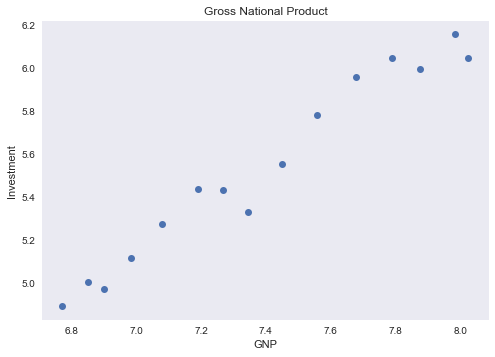

In [1488]:
# Exercice 2


X = np.log(df['gnp'])
Y = np.log(df['invest'])

fig, ax = plt.subplots()
ax.plot(X, Y,linestyle="",marker="o")

ax.set(xlabel='GNP', ylabel='Investment',
       title='Gross National Product')
ax.grid()

In [1489]:
# Exercice 3
intercept = np.mean(Y) - np.mean(X)
n = len(Y)
Y_mean = np.mean(Y)
X_mean = np.mean(X)
theta_1 = sum((X - X_mean)*(Y - Y_mean))/sum((X-X_mean)**2)
theta_0 = Y_mean - (X_mean*theta_1)

residual = sum((Y - (theta_0 + X*theta_1))**2)

var_hat = 1/(n-2) * residual

sigma_theta0 = np.sqrt(var_hat*1/n*X_mean**2/sum((X-X_mean)**2))

sigma_theta1 = np.sqrt((var_hat*1/sum((X-X_mean)**2)))

theta_hat = [theta_0,theta_1]

R_square = 1 - residual/sum((Y - Y_mean)**2)

intercept

-1.8507607793429495

In [1490]:
sigma_X = np.std(X)
Quant_student = 1.771 # alpha =0.05 & freedom = n-2 = 13
x

theta1_stat = theta1/sigma_theta1

p_value = 0 #(from student t-test table)
theta1_stat

18.33198445686668

In [1565]:
Pred_Ylog = np.sum(theta_0) + np.sum(theta_1*np.log(1000))
Pred_Y = np.exp(Pred_Ylog)
theta_lowertail = theta1 - (sigma_theta1/Quant_student*np.sqrt(n))
theta_uppertail = theta1 + (sigma_theta1/Quant_student*np.sqrt(n))

lower_predtail = Pred_Ylog = np.sum(theta_0) + np.sum(theta_lowertail*np.log(1000))
upper_predtail = Pred_Ylog = np.sum(theta_0) + np.sum(theta_uppertail*np.log(1000))

pred_interval = (np.exp(lower_predtail),np.exp(upper_predtail))
pred_interval


Pred_Y

155.97942793105466

[Text(0,0.5,'Investment'),
 Text(0.5,0,'GNP'),
 Text(0.5,1,'Gross National Product')]

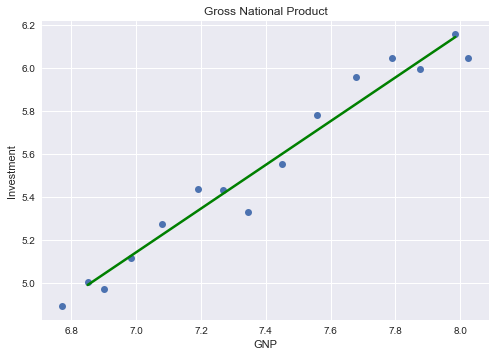

In [1492]:

ones = np.ones(len(X))
X_matrix = np.stack((ones,X),axis=1)

prediction_line =[]

for i in X:
    if i>min_X and i<max(X):
        prediction_line.append(theta_0 + theta_1*i)
        
mpl.style.use('seaborn')
fig, ax = plt.subplots()
ax.plot(X, Y,linestyle="",marker="o")
ax.plot(X[1:-1], prediction_line, color='green', linewidth=2.5)

ax.set(xlabel='GNP', ylabel='Investment',
            title='Gross National Product')


In [1493]:
import statsmodels.api as sm

est = sm.OLS(Y, X_matrice)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 invest   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     336.1
Date:                Sun, 14 Oct 2018   Prob (F-statistic):           1.14e-10
Time:                        18:37:08   Log-Likelihood:                 16.311
No. Observations:                  15   AIC:                            -28.62
Df Residuals:                      13   BIC:                            -27.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9636      0.410     -4.795      0.0

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


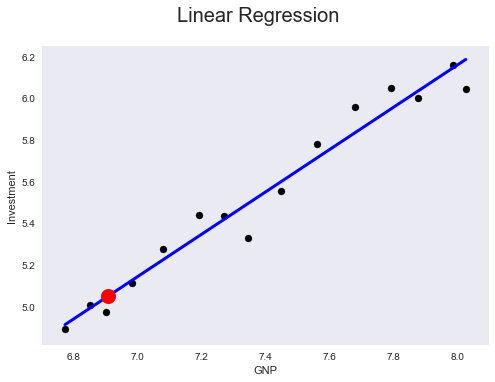

In [1566]:
from sklearn import linear_model

gnp_test = np.array([1,np.log(1000)]).reshape(1,-1)

regr = linear_model.LinearRegression()
regr.fit(X_matrix, Y)
Y_pred = regr.predict(X_matrix)
Y_pred1 = regr.predict(gnp_test)

fig, ax = plt.subplots()
plt.scatter(X, Y,  color='black')
plt.plot(X, Y_pred, color='blue', linewidth=3)
plt.plot(gnp_test[0,1],Y_pred1, linestyle="",marker="o",color ='red',ms =15)

plt.suptitle('Linear Regression', fontsize=20)
plt.xlabel('GNP')
plt.ylabel('Investment')

plt.grid()
assert np.exp(Y_pred1) == Pred_Y, 'The two predictions for Y does not match'



In [1567]:
from numpy.linalg import inv,eig


X2 = np.array(df['interest']).reshape(-1,1)
X_mat = np.column_stack((X_matrix,X2))
Y = np.array(Y).reshape(-1,1)
print (np.shape(Y))
print(np.shape(X_mat))

np.shape(X_mat.T.dot(X_mat))
np.shape(X_mat.T.dot(Y))

assert np.shape(thetas) == (3,1), 'There is a problem of matrix dimension'

eigval , eigvec = eig(X_mat.T.dot(X_mat)) # setting eigenvalues and eigenvectors

eigval_mat = eigval*np.eye(3,3) # eigen value matrix

reconstructed_matrix = eigvec.dot(eigval_mat).dot(eigvec.T)
XTX_matrix = X_mat.T.dot(X_mat)

 
U= np.random.rand(1,3) # Setting a random vector U of shape (1,3)

if np.round(U.dot(XTX_matrix).dot(U.T))== np.round(U.dot(reconstructed_matrix).dot(U.T)):
    print ("The two matrices are similar, X is diagonalisable and thus has a full rank of " + str(len(X_mat[0])))

(15, 1)
(15, 3)
The two matrices are similar, X is diagonalisable and thus has a full rank of 3


In [ ]:
thetas = inv(X_mat.T.dot(X_mat)).dot(X_mat.T.dot(Y))
thet0, thet1, thet2,  = thetas

assert np.shape(thetas) == (3,1), "Dimension of thetas vector is incorect"

# Two options to calculate R2
r_squared = sum((X_mat.dot(thetas)-Y_mean)**2)/sum((Y - Y_mean)**2) # Option 1
r_squared1 = 1 - sum((Y - X_mat.dot(thetas))**2)/sum((Y - Y_mean)**2)# Option 2



residu = (1/(n-3))*sum((Y - X_mat.dot(thetas))**2) 
# SSE (similar to Y'(I-H)Y) with H = Xinv(X'X)X'


H = X_mat.dot(inv(X_mat.T.dot(X_mat))).dot(X_mat.T)

assert np.shape(H) == (15,15), 'Dimension of the projector matrix H is incorrect'

SSE = Y.T.dot(np.eye(15,15)-H).dot(Y)/(n-3)
I = np.sqrt(SSE*(inv(X_mat.T.dot(X_mat)))) 

# Diagonal elements of the matrix I are the thetas variance


thet_var = []
for i in range(len(I)):
    thet_var.append(I[i,i])
    

In [ ]:

t_stat0 = thet0/(I[0,0])
t_stat1 = thet1/(I[1,1])
t_stat2 = thet2/(I[2,2])
test = (t_stat0,t_stat1,t_stat2)


In [1499]:
# Displaying OLS result in a dataframe

ols_result = {'thetas': ['theta 0', 'theta 1', 'theta 2'],
         'Coefficient': [thetas[0], thetas[1], thetas[2]],
         'Std err': [thet_var[0],thet_var[1],thet_var[2]],
         'T-stat': [statistic[0],statistic[1],statistic[2]]}
df1 = pd.DataFrame.from_dict(ols_result)
df1

,thetas,Coefficient,Std err,T-stat
0,theta 0,[-2.180454725911659],0.662399,[-3.2917532715749966]
1,theta 1,[1.0512426913199278],0.102061,[10.300102855110923]
2,theta 2,[-0.0065288794060975874],0.015344,[-0.4254947962276262]


In [ ]:
student = 1.771
for i in range(len(test)):
    if test[i]>= -student and test[i]<= student:
        print ('fail to reject the null hypothesis for theta'+str(i))
    else:
        print('reject the null for theta'+str(i))

#Conclusion = From the OLS result, theta2 doesn't seem to be significant at 5% level.
# Therefore we reject the null hypothesis and conclude that theta2 
#(coefficient for the "interest" variable° does NOT add anything meaningfull to explain Y.

In [1544]:
new_observation = np.array([1,np.log(1000),10])
pred_Y_invest = new_observation.dot(thetas)
print (pred_Y_invest)

var_stand = thet_var/np.sqrt(n).reshape(-1,1)

assert np.shape(stand)==(1,3), 'The dimensions of var_stand are incorrect'

print(np.shape(stand), np.shape(thetas))

lower_range_thetas = thetas - (stand.T * 3.012)# Df= 13 and alpha at 99%
upper_range_thetas = thetas + (stand.T * 3.012)

Y_predict_lower = new_observation.dot(lower_range_thetas)
Y_predict_upper = new_observation.dot(upper_range_thetas)

print(Y_predict_lower,Y_predict_upper)
Z.reshape(-1,1)
np.shape(np.array(Y).reshape(-1,1))
Z_plot.T.ravel()
len(Y)

[5.01598373]
(1, 3) (3, 1)
[3.83322133] [6.19874613]


15

ValueError: cannot reshape array of size 15 into shape (15,15)

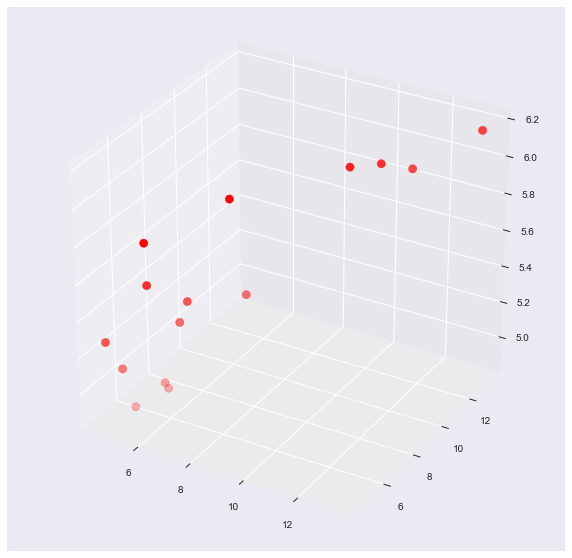

In [1676]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

x_vals = X_plot.T.ravel()
y_vals = Y_plot.T.ravel()
z_vals = Z_plot.T.ravel()


ax.scatter(x_vals,z_vals,y_vals, c='r',marker='o',s= 70)

plan = []
for i in range(len(Y)):
    y_hatplan = X_mat[i,:].dot(thetas)
    plan.append(y_hatplan)
planY = np.array(plan).reshape(xx.shape)

xx , yy = np.meshgrid(x_vals,Y)

ax.plot_surface(xx, yy, planY, color='blue',rstride=1,cstride=1,alpha = 0.1)
                    #plan =  np.column_stack((plan_x,plan_z))

pyplot.show()


   #ax = fig.add_subplot(111, projection='3d')
plt.show()

In [1568]:
est = sm.OLS(Y, X_mat)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     157.5
Date:                Sun, 14 Oct 2018   Prob (F-statistic):           2.44e-09
Time:                        19:18:15   Log-Likelihood:                 16.424
No. Observations:                  15   AIC:                            -26.85
Df Residuals:                      12   BIC:                            -24.72
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1805      0.662     -3.292      0.0

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))
